# Etsy Dataset

The cleaning steps in this notebook are motivated by the following planned analysis questions:
   - Most popular occasions
   - Median price of products (non-wedding products vs. wedding products)
   - Most frequent product type (single-stems or bouquets)
   - Most frequent product type (non-wedding products vs. wedding products)
   - Most and least popular tags
   - Distribution of quantities (one-of-a-kind vs. multiples)
   - Percentage of made-to-order products vs. pre-made
   - Most and least popular intended recipients
   - Most and least popular occasions
   - Most popular styles

## Load

In [1]:
# load all data into a data frame
import numpy as np
import pandas as pd
import ast
import json
import matplotlib.pyplot as plt
%matplotlib inline  


In [2]:
# Load Data
full_dataset = "/Users/kristinafrazier/documents/projects/etsy/data/nov_2020/all_etsy_listings_raw.csv"

# Preliminary cleaning from previous analysis
converters = {"tags": lambda x: x.strip("[]").replace("'","").split(", "),"materials": lambda x: x.strip("[]").replace("'","").split(", ")}
data = pd.read_csv(full_dataset, converters = converters)

df = pd.DataFrame(data)

## Assess

In [3]:
df.head()

,Unnamed: 0,listing_id,state,user_id,category_id,title,description,creation_tsz,ending_tsz,original_creation_tsz,...,is_customizable,is_digital,file_data,should_auto_renew,language,has_variations,taxonomy_id,taxonomy_path,used_manufacturer,is_vintage
0,0,742705844,active,89559032,NaN,"Poppy Flower, 12 Peach Crepe Paper Poppies, Pa...",Important Holiday Deadlines\nAs of today (11/2...,1606608041,1616972441,1574724686,...,True,False,NaN,True,en-US,False,1299,"['Paper & Party Supplies', 'Paper', 'Origami',...",False,False
1,1,707163831,active,5945447,NaN,Downloadable Crepe Paper Orchid Template/PDF P...,Make your own crepe paper orchids using this d...,1606607709,1616972109,1558137436,...,False,True,2 PDF,False,en-US,False,1299,"['Paper & Party Supplies', 'Paper', 'Origami',...",False,False
2,2,911675611,active,32178173,NaN,5 Red Mulberry Paper Ribbons pressed in rolls ...,Saa Mulberry Paper Ribbons \n\nContains: 5 rol...,1606605751,1616970151,1606311789,...,True,False,NaN,False,en-US,False,6606,"['Craft Supplies & Tools', 'Party & Gifting', ...",False,False
3,3,60079349,active,21841,NaN,Handmade Crepe Grass Green Fringe,"Made from grass green crepe paper, this ultra-...",1606604287,1616968687,1288183624,...,True,False,NaN,False,en-US,False,562,['Craft Supplies & Tools'],False,False
4,4,161814267,active,21841,NaN,Handmade Crepe Fringe - Navy Blue,"Made from navy blue crepe paper, this fringe t...",1606604239,1616968639,1378423060,...,True,False,NaN,False,en-US,False,562,['Craft Supplies & Tools'],False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5300 non-null   int64  
 1   listing_id             5300 non-null   int64  
 2   state                  5300 non-null   object 
 3   user_id                5300 non-null   int64  
 4   category_id            0 non-null      float64
 5   title                  5300 non-null   object 
 6   description            5300 non-null   object 
 7   creation_tsz           5300 non-null   int64  
 8   ending_tsz             5300 non-null   int64  
 9   original_creation_tsz  5300 non-null   int64  
 10  last_modified_tsz      5300 non-null   int64  
 11  price                  5300 non-null   float64
 12  currency_code          5300 non-null   object 
 13  quantity               5300 non-null   int64  
 14  sku                    5300 non-null   object 
 15  tags

In [5]:
df.listing_id.value_counts()

761388930    2
773948294    2
641858627    2
844753953    2
892691476    2
            ..
738261708    1
719154411    1
689732845    1
198040155    1
539922523    1
Name: listing_id, Length: 5000, dtype: int64

In [6]:
df[df.listing_id == 761388930]

,Unnamed: 0,listing_id,state,user_id,category_id,title,description,creation_tsz,ending_tsz,original_creation_tsz,...,is_customizable,is_digital,file_data,should_auto_renew,language,has_variations,taxonomy_id,taxonomy_path,used_manufacturer,is_vintage
168,68,761388930,active,136551637,NaN,Multipurpose Paper Pad Kraft Kinaco Kamiterior,Multipurpose paper pad with 10 different types...,1606467178,1616831578,1580585114,...,False,False,NaN,True,en-US,False,1311,"['Paper & Party Supplies', 'Paper', 'Stationer...",False,False
1469,69,761388930,active,136551637,NaN,Multipurpose Paper Pad Kraft Kinaco Kamiterior,Multipurpose paper pad with 10 different types...,1606467178,1616831578,1580585114,...,False,False,NaN,True,en-US,False,1311,"['Paper & Party Supplies', 'Paper', 'Stationer...",False,False


- **Remove Unnamed column. Need a new unique id**
- **Duplicate records**
- **Non-USD records**

In [7]:
df.columns

Index(['Unnamed: 0', 'listing_id', 'state', 'user_id', 'category_id', 'title',
       'description', 'creation_tsz', 'ending_tsz', 'original_creation_tsz',
       'last_modified_tsz', 'price', 'currency_code', 'quantity', 'sku',
       'tags', 'materials', 'shop_section_id', 'featured_rank', 'state_tsz',
       'url', 'views', 'num_favorers', 'shipping_template_id',
       'processing_min', 'processing_max', 'who_made', 'is_supply',
       'when_made', 'item_weight', 'item_weight_unit', 'item_length',
       'item_width', 'item_height', 'item_dimensions_unit', 'is_private',
       'recipient', 'occasion', 'style', 'non_taxable', 'is_customizable',
       'is_digital', 'file_data', 'should_auto_renew', 'language',
       'has_variations', 'taxonomy_id', 'taxonomy_path', 'used_manufacturer',
       'is_vintage'],
      dtype='object')

In [8]:
# Cycle through all columns to inspect of they are relevant to the analysis
df['is_vintage'].value_counts()

False    4815
True      485
Name: is_vintage, dtype: int64

In [9]:
df[df.is_customizable == True].loc[:,['title','description','when_made']]

,title,description,when_made
0,"Poppy Flower, 12 Peach Crepe Paper Poppies, Pa...",Important Holiday Deadlines\nAs of today (11/2...,made_to_order
2,5 Red Mulberry Paper Ribbons pressed in rolls ...,Saa Mulberry Paper Ribbons \n\nContains: 5 rol...,2020_2020
3,Handmade Crepe Grass Green Fringe,"Made from grass green crepe paper, this ultra-...",2020_2020
4,Handmade Crepe Fringe - Navy Blue,"Made from navy blue crepe paper, this fringe t...",made_to_order
13,"Paper Flowers Wall, Nursery Wall Decor, Nurser...",Paper flowers for nursery wall decor will turn...,made_to_order
...,...,...,...
5278,Red giant paper self-standing rose with stem &...,This wonderful rose is absolutely on point: go...,made_to_order
5279,Handmade Crepe Fringe -- Shiny Gold,Made from the most awesome shiny gold crepe pa...,made_to_order
5291,Art Deco Valentine with Puffy Heart,This is an excellent example of Nouveau style....,1910s
5293,Giant Paper Flower with Stem | Huge Paper Peon...,"It would be perfect, stunning paper flower wil...",made_to_order


- **Irrelevant columns:**
    - "active" (these are all active listings)
    - "category_id" (all null data)
    - "creation_tsz" (
    - "ending_tsz"
    - "original_creation_tsz"
    - "last_modified_tsz"
    - "sku"
    - "shop_section_id"
    - "featured_rank"
    - "state_tsz"
    - "shipping_template_id"
    - "processing_min"
    - "processing_max"
    - "is_supply"
    - "item_weight"
    - "item_length"
    - "item_width"
    - "item_height"
    - "item_dimensions_unit"
    - "is_private"
    - "non_taxable"
    - "is_customizable"
    - "is_digital"
    - "file_data"
    - "should_auto_renew"
    - "language"
    - "has_variations"
    - "taxonomy_id"
    - "used_manufacturer"

In [10]:
df["tags"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Crepe Paper Flowers, Mexican Flowers, Day of the Dead, Dia de Los Muertos, Paper Flowers, Wedding Decorations, Party Decorations, Tissue Paper Flowers, Altar Flowers, Birthday Party, Luau, Hawaiian Party, Paper Decorations]                                        65
[background, Baby Shower, Birthday Party, Anniversary, Special Events, Tissue Paper Flowers, Pompoms, Decoration, crepe paper flowers, DIY handmade, wedding engagement, Wedding favors gift, Fan Medallion]                                                            60
[Mexican Flowers, Paper Flowers, Crepe paper, Day of the Dead, tissue paper, Marigold, Dia de Los Muertos, Altar Flowers, Luau, Hawaiian Flowers, Fiesta Decorations, Fiesta Party, Cinco de Mayo]                                                                      59
[Crepe Paper, Mexican flowers, Crafts, Hand Made, Custom, Special Orders, Multicolor, Art]                                                                                                             

In [11]:
df['materials'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                           846
[Paper]                                                      363
[crepe paper]                                                309
[Crepe paper, Wire]                                          204
[Crepe Paper, Wire]                                          186
                                                            ... 
[crepe paper, wire, foam, watercolor pencil]                   1
[alcohol ink, glue, crepe paper, Floral wire]                  1
[bird, faux rhinestones, glue, pipe cleaner, crepe paper]      1
[Cotton]                                                       1
[crepe paper, wire, glue, pan pastel]                          1
Name: materials, Length: 1371, dtype: int64

In [12]:
df['style'].value_counts()

['Cottage Chic', 'Traditional']         370
['Traditional', 'Retro']                194
['Art Deco']                             93
['Cottage Chic', 'Retro']                80
['Cовременный', 'Неоклассический']       63
                                       ... 
['Asian', 'Folk']                         1
['paper flowers', 'wedding flowers']      1
['Modern', 'Traditional']                 1
['French Revolution', 'french']           1
['Primitive', 'Folk']                     1
Name: style, Length: 120, dtype: int64

- **The "tags","materials", and "style" columns contain lists and should be separate tables.**

In [13]:
df.describe()

,Unnamed: 0,listing_id,user_id,category_id,creation_tsz,ending_tsz,original_creation_tsz,last_modified_tsz,price,quantity,...,views,num_favorers,shipping_template_id,processing_min,processing_max,item_weight,item_length,item_width,item_height,taxonomy_id
count,5300.000000,5.300000e+03,5.300000e+03,0.0,5.300000e+03,5.300000e+03,5.300000e+03,5.300000e+03,5300.000000,5300.000000,...,5300.000000,5300.000000,2.968000e+03,4989.000000,4989.000000,1276.000000,1220.000000,1220.000000,1220.000000,5300.000000
mean,49.500000,6.575593e+08,9.102010e+07,NaN,1.602223e+09,1.612727e+09,1.541506e+09,1.603319e+09,411.447558,122.120000,...,423.416981,42.539811,6.305350e+10,2.589898,5.082582,39.592578,36.946311,21.739652,12.234103,2417.972264
std,28.868794,2.161593e+08,9.155163e+07,NaN,3.056180e+06,2.991731e+06,6.822802e+07,2.726965e+06,14383.182372,599.674719,...,1851.487146,149.646820,3.385608e+10,2.788629,4.334592,116.845961,90.108669,50.772945,33.663169,2253.648798
min,0.000000,1.706933e+07,1.512000e+03,NaN,1.596576e+09,1.607120e+09,1.226167e+09,1.596580e+09,0.180000,1.000000,...,0.000000,0.000000,1.930707e+06,1.000000,1.000000,0.010000,1.000000,0.500000,0.100000,1.000000
25%,24.750000,5.810772e+08,2.504739e+07,NaN,1.599617e+09,1.610162e+09,1.516895e+09,1.601136e+09,10.000000,1.000000,...,17.000000,1.000000,3.684426e+10,1.000000,3.000000,6.000000,10.000000,6.000000,3.000000,1029.000000
50%,49.500000,7.248329e+08,4.580547e+07,NaN,1.602326e+09,1.612957e+09,1.566372e+09,1.603950e+09,20.000000,9.000000,...,66.000000,6.000000,6.778038e+10,1.000000,3.000000,12.000000,12.000000,8.500000,5.000000,1339.000000
75%,74.250000,8.123753e+08,1.392848e+08,NaN,1.604972e+09,1.615340e+09,1.591169e+09,1.605823e+09,46.900000,66.000000,...,264.000000,22.000000,8.860921e+10,3.000000,5.000000,21.000000,17.000000,12.000000,8.000000,1857.000000
max,99.000000,9.137562e+08,3.990173e+08,NaN,1.606612e+09,1.616976e+09,1.606597e+09,1.606613e+09,807229.000000,37050.000000,...,64959.000000,2453.000000,1.175557e+11,30.000000,40.000000,1500.000000,630.000000,500.000000,315.000000,12109.000000


In [14]:
df[df.price == df.price.max()][['price','title','description','url']]

,price,title,description,url
2793,807229.0,Handmade Crepe Paper Spider Lily/ Shorttube Ly...,Height: 50 cm (19.7&quot;)\nQuantity of flower...,https://www.etsy.com/listing/800170450/handmad...


In [15]:
df[df.price == df.price.max()]

,Unnamed: 0,listing_id,state,user_id,category_id,title,description,creation_tsz,ending_tsz,original_creation_tsz,...,is_customizable,is_digital,file_data,should_auto_renew,language,has_variations,taxonomy_id,taxonomy_path,used_manufacturer,is_vintage
2793,93,800170450,active,285371641,NaN,Handmade Crepe Paper Spider Lily/ Shorttube Ly...,Height: 50 cm (19.7&quot;)\nQuantity of flower...,1601049632,1611594032,1590293357,...,True,False,NaN,False,en-US,True,1020,"['Home & Living', 'Home Décor', 'Floral Arrang...",False,False


In [16]:
df[df.price == df.price.max()]['url']

2793    https://www.etsy.com/listing/800170450/handmad...
Name: url, dtype: object

In [17]:
df[df.currency_code == 'USD'].describe()

,Unnamed: 0,listing_id,user_id,category_id,creation_tsz,ending_tsz,original_creation_tsz,last_modified_tsz,price,quantity,...,views,num_favorers,shipping_template_id,processing_min,processing_max,item_weight,item_length,item_width,item_height,taxonomy_id
count,4332.000000,4.332000e+03,4.332000e+03,0.0,4.332000e+03,4.332000e+03,4.332000e+03,4.332000e+03,4332.000000,4332.000000,...,4332.000000,4332.000000,2.275000e+03,4083.000000,4083.000000,1187.000000,1131.000000,1131.000000,1131.000000,4332.000000
mean,49.334257,6.371231e+08,8.069963e+07,NaN,1.602104e+09,1.612610e+09,1.535260e+09,1.603210e+09,46.453442,139.572253,...,465.525162,48.512004,6.006693e+10,2.656135,5.253735,17.925131,13.240053,8.958776,5.627768,2308.129040
std,29.055636,2.250782e+08,8.748556e+07,NaN,3.032563e+06,2.970072e+06,7.162034e+07,2.734699e+06,126.643713,657.287102,...,2014.103832,163.155819,3.450736e+10,2.923792,4.526830,24.027907,13.364592,7.455696,6.147793,2162.878934
min,0.000000,1.706933e+07,1.512000e+03,NaN,1.596576e+09,1.607120e+09,1.226167e+09,1.596580e+09,0.980000,1.000000,...,0.000000,0.000000,1.930707e+06,1.000000,1.000000,0.010000,1.000000,0.500000,0.100000,1.000000
25%,24.000000,5.348660e+08,2.077746e+07,NaN,1.599581e+09,1.610126e+09,1.498629e+09,1.601088e+09,10.500000,1.000000,...,17.000000,1.000000,3.078108e+10,1.000000,3.000000,5.000000,9.250000,6.000000,2.000000,1029.000000
50%,49.000000,7.009317e+08,3.851151e+07,NaN,1.602198e+09,1.612829e+09,1.558560e+09,1.603746e+09,20.750000,10.000000,...,72.000000,7.000000,6.778038e+10,1.000000,3.000000,12.000000,12.000000,8.000000,5.000000,1339.000000
75%,74.250000,7.998775e+08,1.211586e+08,NaN,1.604787e+09,1.615155e+09,1.589041e+09,1.605744e+09,49.600000,87.000000,...,301.000000,25.000000,8.645888e+10,3.000000,5.000000,17.000000,16.000000,12.000000,7.000000,1662.000000
max,99.000000,9.137562e+08,3.962800e+08,NaN,1.606608e+09,1.616972e+09,1.606597e+09,1.606613e+09,4999.900000,37050.000000,...,64959.000000,2453.000000,1.175557e+11,30.000000,40.000000,350.000000,410.000000,210.000000,150.000000,12109.000000


In [18]:
df_usd = df[(df.currency_code == 'USD')]
df_usd[df_usd.price == df_usd.price.max()]['url']

3502    https://www.etsy.com/listing/579435154/giant-s...
Name: url, dtype: object

In [19]:
df_usd.sort_values('price')['price'].tail(10)

4641    1069.0
4642    1069.0
832     1199.9
3044    1300.0
3503    1499.9
968     1499.9
3081    1999.9
1196    2050.0
761     2363.0
3502    4999.9
Name: price, dtype: float64

''

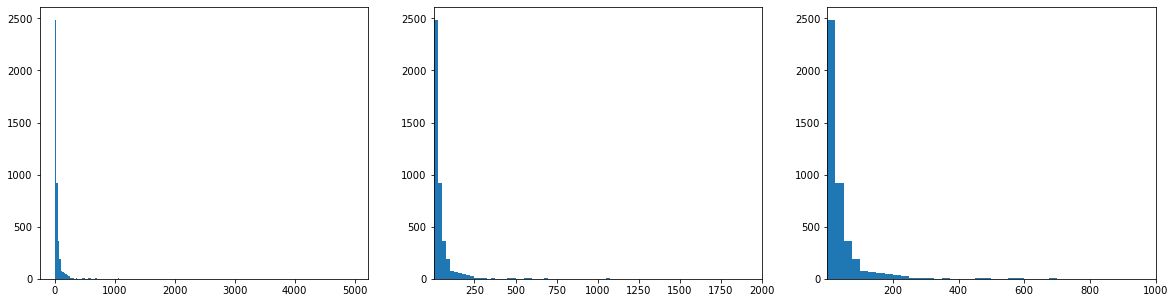

In [20]:
plt.figure(figsize = [20,5])

bins = np.arange(0,5000,25)

plt.subplot(1,3,1)
plt.hist(x = df_usd.price, bins = bins)

plt.subplot(1,3,2)
plt.hist(x = df_usd.price, bins = bins)
plt.xlim(1,2000)

plt.subplot(1,3,3)
plt.hist(x = df_usd.price, bins = bins)
plt.xlim(1,1000)
         
;

The price data is right skewed but not strongly enough to justify excluding the $4,999 listing from the dataset. It will just justify taking median measures of prices instead of averages.

## Plan

### Cleaning Tasks:

1. The "tags","materials", and "style" columns contain lists and should be separate tables.
2. Irrelevant columns:
    - "Unnamed: 0"
    - "active" (these are all active listings)
    - "category_id" (all null data)
    - "creation_tsz" (
    - "ending_tsz"
    - "original_creation_tsz"
    - "last_modified_tsz"
    - "sku"
    - "shop_section_id"
    - "featured_rank"
    - "state_tsz"
    - "shipping_template_id"
    - "processing_min"
    - "processing_max"
    - "is_supply"
    - "item_weight"
    - "item_length"
    - "item_width"
    - "item_height"
    - "item_dimensions_unit"
    - "is_private"
    - "non_taxable"
    - "is_customizable"
    - "is_digital"
    - "file_data"
    - "should_auto_renew"
    - "language"
    - "has_variations"
    - "taxonomy_id"
    - "used_manufacturer"
3. Duplicate records
4. Non-USD records
5. Make all text lowercase

## Clean

In [21]:
listings_main = df.copy()

#### 1. Remove "tags","materials", "style", and "taxonomy" columns, and save to separate tables

In [22]:
# Create intermediate separate tables
listings_tags = listings_main[['listing_id','tags']]
listings_materials = listings_main[['listing_id','materials']]
listings_style = listings_main[['listing_id','style']]
listings_taxonomy = listings_main[['listing_id','taxonomy_path']]


In [23]:
# Drop null data
listings_tags = listings_tags.dropna()
listings_materials = listings_materials.dropna()
listings_style = listings_style.dropna()
listings_taxonomy = listings_taxonomy.dropna()

In [24]:
# Reset indices for index-based looping (this is to use the explode method for style and taxonomy
# The style and taxonomy columns are string representations of lists and need to be converted to lists to use the explode method below
listings_style = listings_style.reset_index(drop = True)
listings_taxonomy = listings_taxonomy.reset_index(drop = True)

In [25]:
# Convert style and taxonomy columns from string representations of lists to lists
style = []

for i in range(len(listings_style)):
    style_list = ast.literal_eval(listings_style['style'][i])
    style.append(style_list)
    
listings_style['style'] = style
    
taxonomy = []

for i in range(len(listings_taxonomy)):
    taxonomy_list = ast.literal_eval(listings_taxonomy['taxonomy_path'][i])
    taxonomy.append(taxonomy_list)

listings_taxonomy['taxonomy_path'] = taxonomy

In [26]:
# Explode lists within each row and redefine tables
explode_tags = listings_tags.explode('tags')
listings_tags = pd.DataFrame(explode_tags)

explode_materials = listings_materials.explode('materials')
listings_materials = pd.DataFrame(explode_materials)

explode_taxonomy = listings_taxonomy.explode('taxonomy_path')
listings_taxonomy = pd.DataFrame(explode_taxonomy)

explode_style = listings_style.explode('style')
listings_style = pd.DataFrame(explode_style)

In [27]:
# Drop null data
listings_tags = listings_tags.dropna()
listings_materials = listings_materials.dropna()
listings_style = listings_style.dropna()
listings_taxonomy = listings_taxonomy.dropna()

# Drop columns from main listing table
listings_main = listings_main.drop(labels = ['tags','materials','style','taxonomy_path'], axis = 1)

#### 2. Remove irrelevant columns

In [28]:
drop = ['Unnamed: 0','state','category_id', 'creation_tsz','ending_tsz','original_creation_tsz', 'last_modified_tsz', 
        'sku', 'shop_section_id', 'featured_rank','state_tsz','shipping_template_id',
        'processing_min','processing_max','is_supply','item_weight','item_length','item_width',
        'item_height','item_dimensions_unit','is_private','non_taxable','is_customizable',
        'is_digital','file_data', 'should_auto_renew', 'language', 'has_variations', 'taxonomy_id', 
        'used_manufacturer','item_weight_unit']

listings_main = listings_main.drop(labels = drop, axis = 1)
listings_main.head(2)

,listing_id,user_id,title,description,price,currency_code,quantity,url,views,num_favorers,who_made,when_made,recipient,occasion,is_vintage
0,742705844,89559032,"Poppy Flower, 12 Peach Crepe Paper Poppies, Pa...",Important Holiday Deadlines\nAs of today (11/2...,50.00,USD,3,https://www.etsy.com/listing/742705844/poppy-f...,68,15,i_did,made_to_order,NaN,NaN,False
1,707163831,5945447,Downloadable Crepe Paper Orchid Template/PDF P...,Make your own crepe paper orchids using this d...,1.99,CAD,973,https://www.etsy.com/listing/707163831/downloa...,542,61,i_did,2020_2020,NaN,NaN,False


In [29]:
listings_main.columns

Index(['listing_id', 'user_id', 'title', 'description', 'price',
       'currency_code', 'quantity', 'url', 'views', 'num_favorers', 'who_made',
       'when_made', 'recipient', 'occasion', 'is_vintage'],
      dtype='object')

#### 3. Remove duplicate records

In [30]:
listings_main[listings_main.duplicated()]

,listing_id,user_id,title,description,price,currency_code,quantity,url,views,num_favorers,who_made,when_made,recipient,occasion,is_vintage
301,742705844,89559032,"Poppy Flower, 12 Peach Crepe Paper Poppies, Pa...",Important Holiday Deadlines\nAs of today (11/2...,50.00,USD,3,https://www.etsy.com/listing/742705844/poppy-f...,68,15,i_did,made_to_order,NaN,NaN,False
302,707163831,5945447,Downloadable Crepe Paper Orchid Template/PDF P...,Make your own crepe paper orchids using this d...,1.99,CAD,973,https://www.etsy.com/listing/707163831/downloa...,542,61,i_did,2020_2020,NaN,NaN,False
303,911675611,32178173,5 Red Mulberry Paper Ribbons pressed in rolls ...,Saa Mulberry Paper Ribbons \n\nContains: 5 rol...,3.00,USD,1,https://www.etsy.com/listing/911675611/5-red-m...,2,0,collective,2020_2020,NaN,NaN,False
304,60079349,21841,Handmade Crepe Grass Green Fringe,"Made from grass green crepe paper, this ultra-...",5.25,USD,1,https://www.etsy.com/listing/60079349/handmade...,1499,77,i_did,2020_2020,NaN,NaN,False
305,161814267,21841,Handmade Crepe Fringe - Navy Blue,"Made from navy blue crepe paper, this fringe t...",5.25,USD,4,https://www.etsy.com/listing/161814267/handmad...,213,12,i_did,made_to_order,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,708389545,45363781,Italian Crepe Paper - Dusky Plum - 19&quot; x ...,Whether you are making realistic paper flowers...,10.95,USD,1,https://www.etsy.com/listing/708389545/italian...,66,7,someone_else,2010_2019,NaN,NaN,False
2596,223954266,10148767,"black and white tissue paper: lines, bars, fir...",description:\n4 sheets of black and white tiss...,4.00,CAD,4,https://www.etsy.com/listing/223954266/black-a...,477,49,someone_else,2020_2020,NaN,NaN,False
2597,794774542,155611395,Italian Crepe Paper Rolls 180g Cartotecnica Ro...,Crepe paper could be the perfect design elemen...,8.95,USD,72,https://www.etsy.com/listing/794774542/italian...,1246,31,i_did,2020_2020,NaN,NaN,False
2598,870636020,213136301,"Crepe Paper Lavender, Artificial Flowers for b...",Every flower is handmade from Italian crepe pa...,6.00,USD,5,https://www.etsy.com/listing/870636020/crepe-p...,6,1,i_did,made_to_order,NaN,NaN,False


In [31]:
listings_main[listings_main.listing_id == 742705844]

,listing_id,user_id,title,description,price,currency_code,quantity,url,views,num_favorers,who_made,when_made,recipient,occasion,is_vintage
0,742705844,89559032,"Poppy Flower, 12 Peach Crepe Paper Poppies, Pa...",Important Holiday Deadlines\nAs of today (11/2...,50.0,USD,3,https://www.etsy.com/listing/742705844/poppy-f...,68,15,i_did,made_to_order,NaN,NaN,False
301,742705844,89559032,"Poppy Flower, 12 Peach Crepe Paper Poppies, Pa...",Important Holiday Deadlines\nAs of today (11/2...,50.0,USD,3,https://www.etsy.com/listing/742705844/poppy-f...,68,15,i_did,made_to_order,NaN,NaN,False


In [32]:
listings_tags[listings_tags.listing_id == 742705844]

,listing_id,tags
0,742705844,Poppy Flower
0,742705844,Peach Flowers
0,742705844,Crepe Paper Flowers
0,742705844,Crepe Paper Poppy
0,742705844,Peach Poppy
0,742705844,Poppy Gifts
0,742705844,Handmade Flowers
0,742705844,Eco Friendly Flowers
0,742705844,Build A Bouquet
0,742705844,Poppy Bouquet


In [33]:
listings_main.drop_duplicates(inplace = True, ignore_index = True)
listings_materials.drop_duplicates(inplace = True, ignore_index = True)
listings_tags.drop_duplicates(inplace = True, ignore_index = True)
listings_taxonomy.drop_duplicates(inplace = True, ignore_index = True)
listings_style.drop_duplicates(inplace = True, ignore_index = True)

In [34]:
listings_main.head()

,listing_id,user_id,title,description,price,currency_code,quantity,url,views,num_favorers,who_made,when_made,recipient,occasion,is_vintage
0,742705844,89559032,"Poppy Flower, 12 Peach Crepe Paper Poppies, Pa...",Important Holiday Deadlines\nAs of today (11/2...,50.00,USD,3,https://www.etsy.com/listing/742705844/poppy-f...,68,15,i_did,made_to_order,NaN,NaN,False
1,707163831,5945447,Downloadable Crepe Paper Orchid Template/PDF P...,Make your own crepe paper orchids using this d...,1.99,CAD,973,https://www.etsy.com/listing/707163831/downloa...,542,61,i_did,2020_2020,NaN,NaN,False
2,911675611,32178173,5 Red Mulberry Paper Ribbons pressed in rolls ...,Saa Mulberry Paper Ribbons \n\nContains: 5 rol...,3.00,USD,1,https://www.etsy.com/listing/911675611/5-red-m...,2,0,collective,2020_2020,NaN,NaN,False
3,60079349,21841,Handmade Crepe Grass Green Fringe,"Made from grass green crepe paper, this ultra-...",5.25,USD,1,https://www.etsy.com/listing/60079349/handmade...,1499,77,i_did,2020_2020,NaN,NaN,False
4,161814267,21841,Handmade Crepe Fringe - Navy Blue,"Made from navy blue crepe paper, this fringe t...",5.25,USD,4,https://www.etsy.com/listing/161814267/handmad...,213,12,i_did,made_to_order,NaN,NaN,False


In [35]:
listings_main.listing_id.value_counts()

909838653    2
799030809    2
594411385    2
844753953    2
861639646    2
            ..
750970174    1
634303345    1
536532292    1
750956244    1
539922523    1
Name: listing_id, Length: 5000, dtype: int64

In [36]:
listings_main[listings_main.listing_id == 909838653]

,listing_id,user_id,title,description,price,currency_code,quantity,url,views,num_favorers,who_made,when_made,recipient,occasion,is_vintage
273,909838653,168215327,Rainbow Wreath Crepe Paper Flowers Faux Floral...,Golden hoop wreath with green tropical leaves ...,56.0,USD,1,https://www.etsy.com/listing/909838653/rainbow...,8,2,i_did,2020_2020,NaN,NaN,False
2311,909838653,168215327,Rainbow Wreath Crepe Paper Flowers Faux Floral...,Golden hoop wreath with green tropical leaves ...,56.0,USD,1,https://www.etsy.com/listing/909838653/rainbow...,10,2,i_did,2020_2020,NaN,NaN,False


There are still some instances where the listing is the same, but some details are different. In the above case, it's the number of views. It looks like this is a case where the user relisting the same listing. So, in this case, we can treat them as two listings. For these cases, the duplicate tags, materials, styles, and taxonomies have been removed. Contextually, this is still ok, because the analysis of these data will treat these similar records as one record. 

In [37]:
listings_tags[listings_tags.listing_id == 742705844]

,listing_id,tags
0,742705844,Poppy Flower
1,742705844,Peach Flowers
2,742705844,Crepe Paper Flowers
3,742705844,Crepe Paper Poppy
4,742705844,Peach Poppy
5,742705844,Poppy Gifts
6,742705844,Handmade Flowers
7,742705844,Eco Friendly Flowers
8,742705844,Build A Bouquet
9,742705844,Poppy Bouquet


#### 4. Remove non-USD records

In [38]:
listings_main = listings_main.query('currency_code == "USD"')
listings_main.currency_code.value_counts()

USD    4114
Name: currency_code, dtype: int64

#### 5. Make all text lowercase

In [39]:
listings_main = listings_main.apply(lambda x: x.astype(str).str.lower())
listings_tags = listings_tags.apply(lambda x: x.astype(str).str.lower())
listings_materials = listings_materials.apply(lambda x: x.astype(str).str.lower())
listings_style = listings_style.apply(lambda x: x.astype(str).str.lower())
listings_taxonomy = listings_taxonomy.apply(lambda x: x.astype(str).str.lower())

## Review Datasets

In [40]:
print(listings_main.head(5))
print(listings_tags.head(5))
print(listings_materials.head(5))
print(listings_style.head(5))
print(listings_taxonomy.head(5))

  listing_id    user_id                                              title  \
0  742705844   89559032  poppy flower, 12 peach crepe paper poppies, pa...   
2  911675611   32178173  5 red mulberry paper ribbons pressed in rolls ...   
3   60079349      21841                  handmade crepe grass green fringe   
4  161814267      21841                  handmade crepe fringe - navy blue   
5  899384366  232189536  custom crepe paper headband, crepe paper flora...   

                                         description price currency_code  \
0  important holiday deadlines\nas of today (11/2...  50.0           usd   
2  saa mulberry paper ribbons \n\ncontains: 5 rol...   3.0           usd   
3  made from grass green crepe paper, this ultra-...  5.25           usd   
4  made from navy blue crepe paper, this fringe t...  5.25           usd   
5  blooming beautiful floral crown \n\nour lively...  85.0           usd   

  quantity                                                url views  \
0  

## Save Clean Datasets

In [41]:
listings_main.to_csv("/Users/kristinafrazier/documents/projects/etsy/data/nov_2020/listings_main.csv", index = False)
listings_materials.to_csv("/Users/kristinafrazier/documents/projects/etsy/data/nov_2020/listings_materials.csv", index = False)
listings_tags.to_csv("/Users/kristinafrazier/documents/projects/etsy/data/nov_2020/listings_tags.csv", index = False)
listings_style.to_csv("/Users/kristinafrazier/documents/projects/etsy/data/nov_2020/listings_style.csv", index = False)
listings_taxonomy.to_csv("/Users/kristinafrazier/documents/projects/etsy/data/nov_2020/listings_taxonomy.csv", index = False)